In [5]:
import librosa
import matplotlib.pyplot as plt
import numpy as np
import IPython.display as ipd

In [8]:
audio_path = 'AAR754.wav'
ipd.Audio(audio_path)

Output hidden; open in https://colab.research.google.com to view.

In [11]:
audio, sr = librosa.load(audio_path, sr=None)

# Magnitude Spectrum

In [15]:
audio_ft = np.fft.fft(audio)
audio_ft[0]

(133949.77478027344+1.9548807017599756e-12j)

In [18]:
def plot_magnitude_spectrum(signal, title, sr, f_ratio=1):
  ft = np.fft.fft(signal)
  magnitude = np.abs(ft)
  frequency = np.linspace(0, sr, len(magnitude))
  num_frequency_bins = int(len(frequency) * f_ratio)
  plt.plot(frequency[:num_frequency_bins], magnitude[:num_frequency_bins])
  plt.title(title)
  plt.xlabel('Frequency')
  plt.ylabel('Magnitude')
  plt.show()

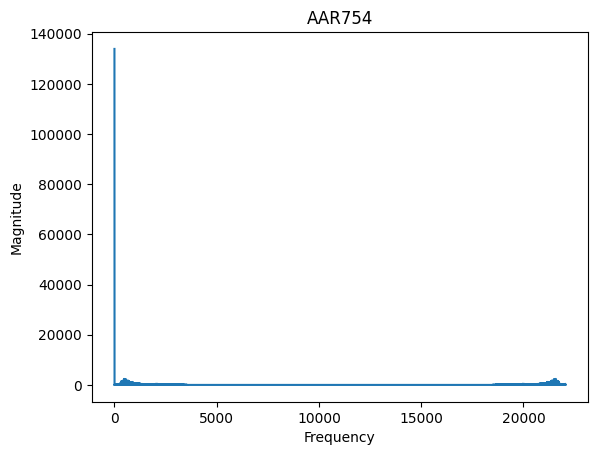

In [24]:
plot_magnitude_spectrum(audio, "AAR754", sr, 1)

# Extracting Short-Time Fourier Transform

In [25]:
FRAME_SIZE = 2048
HOP_SIZE = 512

In [26]:
S_audio = librosa.stft(audio, n_fft=FRAME_SIZE, hop_length=HOP_SIZE)

In [27]:
S_audio.shape

(1025, 11179)

In [28]:
type(S_audio[0][0])

numpy.complex64

In [29]:
# Calculate Spectrogram
Y_audio = np.abs(S_audio) ** 2

In [30]:
Y_audio.shape

(1025, 11179)

In [31]:
type(Y_audio[0][0])

numpy.float32

In [32]:
# Visualizing Spectrogram
def plot_spectrogram(Y, sr, hop_length, y_axis='linear'):
  plt.figure(figsize=(25, 10))
  librosa.display.specshow(Y, sr=sr, hop_length=hop_length, x_axis='time', y_axis=y_axis)
  plt.colorbar(format='%+2.f dB')

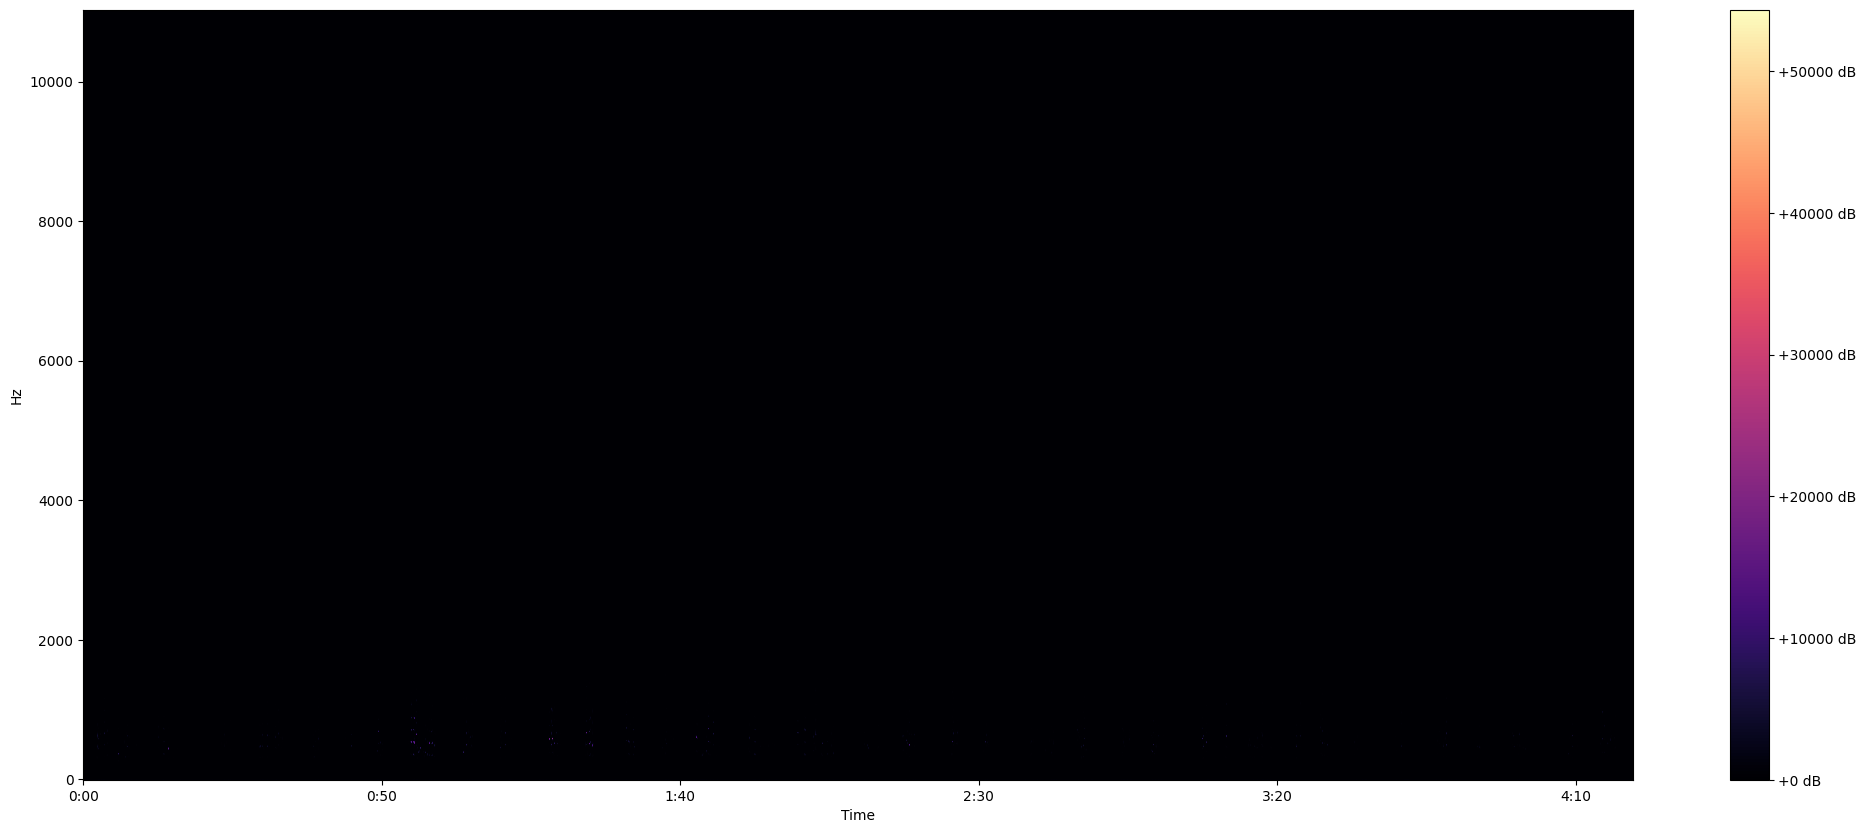

In [33]:
plot_spectrogram(Y_audio, sr, HOP_SIZE)

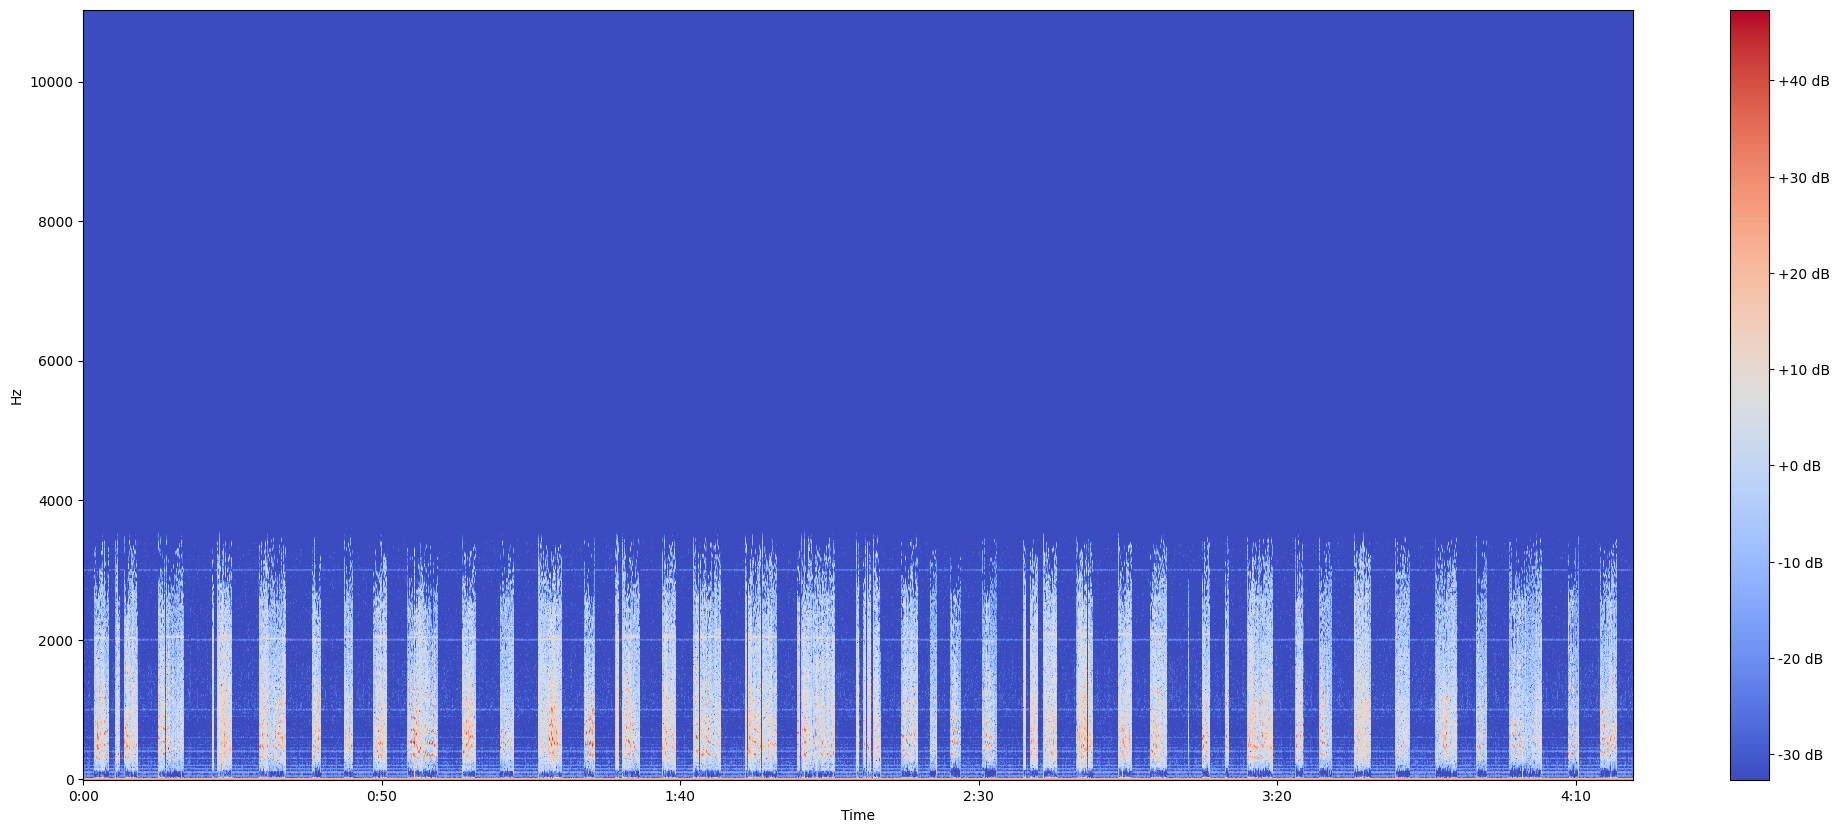

In [34]:
# Log Amplitude Spectrogram
Y_log_audio = librosa.power_to_db(Y_audio)
plot_spectrogram(Y_log_audio, sr, HOP_SIZE)

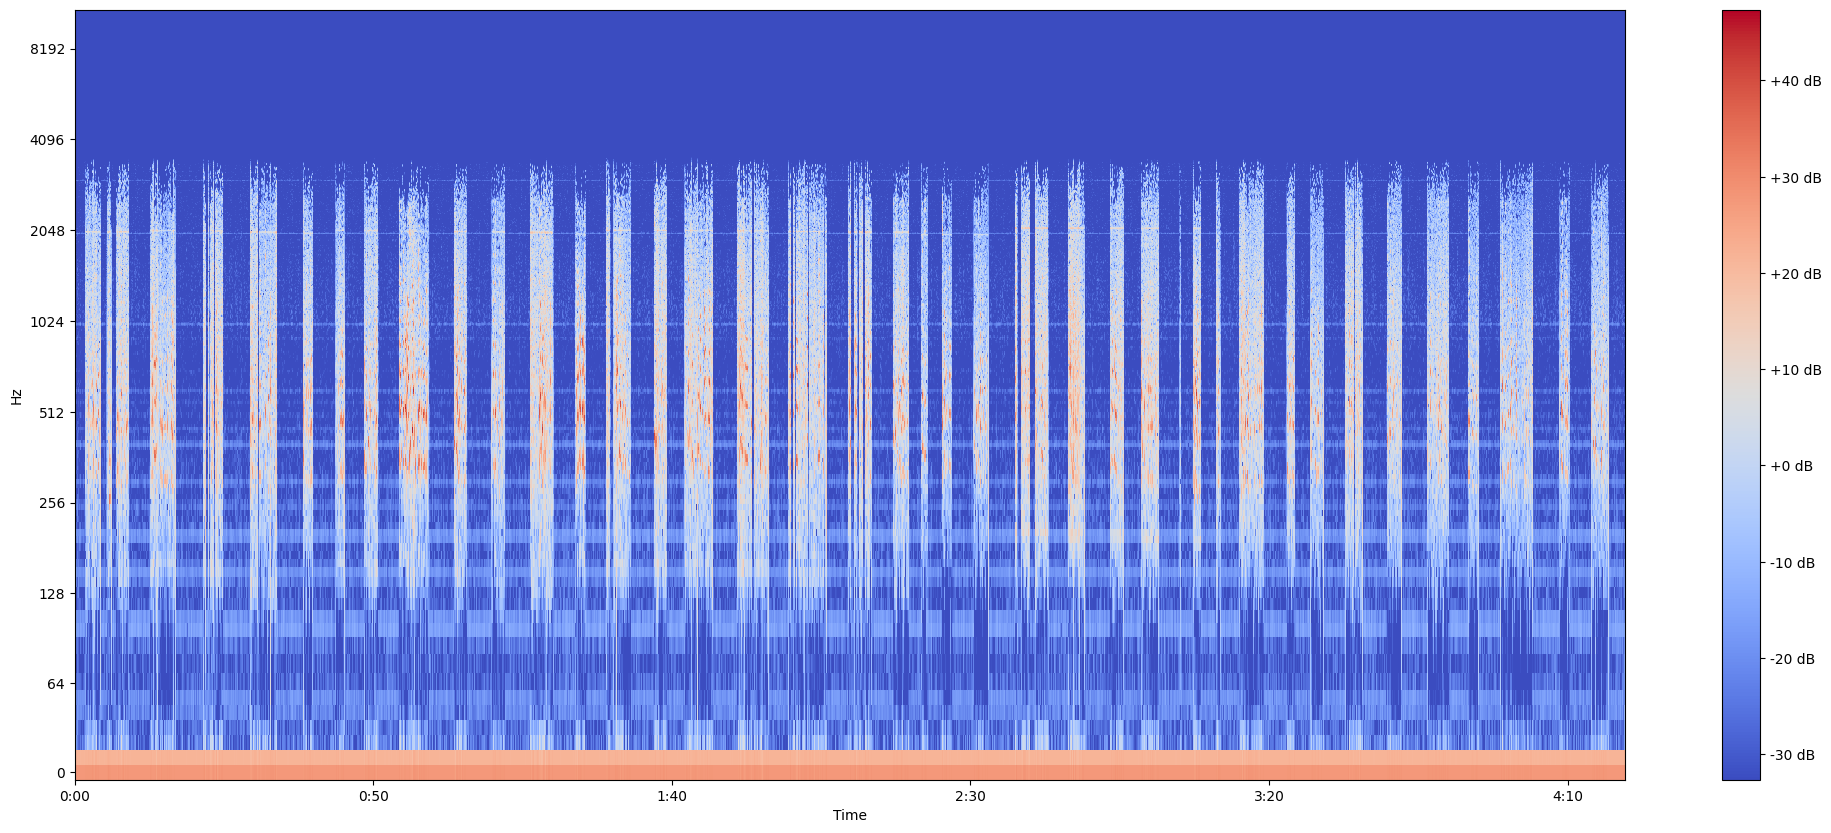

In [35]:
# Log-Frequency Spectrogram
plot_spectrogram(Y_log_audio, sr, HOP_SIZE, y_axis='log')